<a href="https://colab.research.google.com/github/Mukolwe29/KCB-Data-science-and-AI/blob/master/DL_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing tensorflow
#!pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,  OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

**Python Code Example: Basic Neuron Calculation**

Let's simulate a simple neuron calculation:

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def neuron_output(weights, inputs, bias, activation_function):
    '''Neuron activation function with selectable activation type.'''
    weighted_sum = np.dot(weights, inputs) + bias

    if activation_function == 'relu':
        return np.maximum(0, weighted_sum)
    elif activation_function == 'sigmoid':
        return sigmoid(weighted_sum)
    elif activation_function == 'softmax':
        # Softmax is typically applied across a vector of values (e.g., across a layer's output),
        # but for consistency with the other functions, applying it to the single value here
        return softmax(np.array([weighted_sum]))[0]
    else:
        raise ValueError("Unknown activation function.")

# Example weights, inputs, and bias
weights = np.array([0.5, -0.5])
inputs = np.array([0.7, 0.3])
bias = 1.0

# Calculate neuron output using different activation functions
output_relu = neuron_output(weights, inputs, bias, 'relu')
output_sigmoid = neuron_output(weights, inputs, bias, 'sigmoid')
output_softmax = neuron_output(weights, inputs, bias, 'softmax')

print("Neuron output with ReLU:", output_relu)
print("Neuron output with Sigmoid:", output_sigmoid)
print("Neuron output with Softmax:", output_softmax)

Neuron output with ReLU: 1.2
Neuron output with Sigmoid: 0.7685247834990175
Neuron output with Softmax: 1.0


## House Price Prediction (Regression)

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town. [Housing dataset](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices)

1. CRIM: per capita crime rate by town (numeric)
2.ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to ﬁve Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s


In [4]:
# Load mtcars dataset
housing = pd.read_csv("Boston.csv")

housing.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# Shape of the data
print("Shape of the data",housing.shape)

# summary of the data
housing.describe().round(2)

Shape of the data (506, 14)


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Splitting the data to training and testing

In [ ]:
# Selecting a target variable, for example, 'mpg'
X = housing.drop('MEDV', axis=1)
y = housing['MEDV']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# shape of train data and test data
print("Shape train", X_train.shape)
print("Shape test", X_test.shape)

### Build the Neural Network Model

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer for regression (no activation)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()

### Train the Model

Epoch 1/15
33/33 [==============================] - 1s 22ms/step - loss: 3.2602 - val_loss: 11.9566
Epoch 2/15
33/33 [==============================] - 0s 14ms/step - loss: 3.3401 - val_loss: 10.0475
Epoch 3/15
33/33 [==============================] - 1s 17ms/step - loss: 3.2615 - val_loss: 10.4910
Epoch 4/15
33/33 [==============================] - 1s 18ms/step - loss: 3.3022 - val_loss: 11.1151
Epoch 5/15
33/33 [==============================] - 0s 5ms/step - loss: 3.3755 - val_loss: 9.6308
Epoch 6/15
33/33 [==============================] - 0s 5ms/step - loss: 3.0851 - val_loss: 9.7044
Epoch 7/15
33/33 [==============================] - 0s 5ms/step - loss: 3.1142 - val_loss: 9.6785
Epoch 8/15
33/33 [==============================] - 0s 11ms/step - loss: 3.1272 - val_loss: 9.6254
Epoch 9/15
33/33 [==============================] - 1s 17ms/step - loss: 3.2086 - val_loss: 9.9153
Epoch 10/15
33/33 [==============================] - 0s 14ms/step - loss: 3.3046 - val_loss: 10.7685
Epoch 1

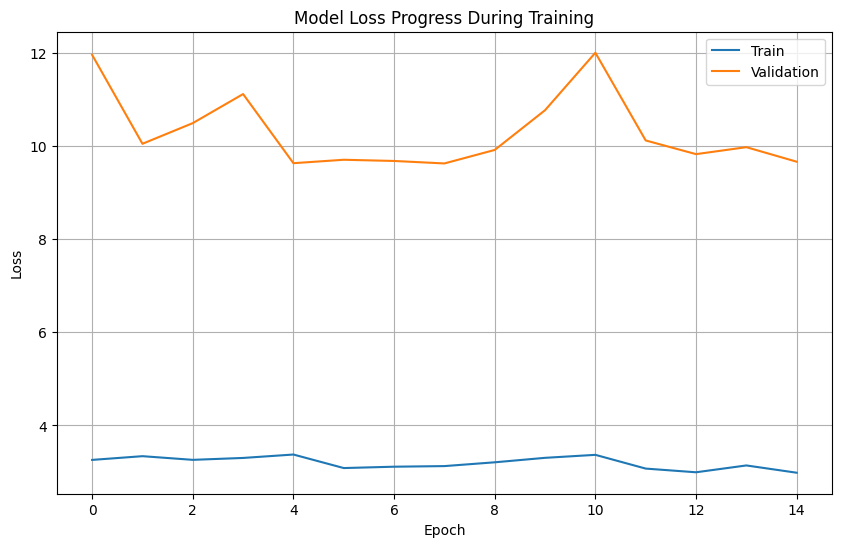

In [ ]:
# Train the model and save the training history
history = model.fit(X_train, y_train, epochs=15, batch_size=10, verbose=1, validation_split=0.2)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

### Evaluate the Model

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test,verbose=0)
print(f"Test Loss: {loss}")

Test Loss: 11.420108795166016


### Make Predictions

In [ ]:
# Predictions
predictions = model.predict(X_test)
predictions

4/4 [==============================] - 0s 9ms/step


array([[26.84261  ],
       [31.536129 ],
       [15.487768 ],
       [21.91384  ],
       [17.060942 ],
       [21.429962 ],
       [19.012129 ],
       [15.212288 ],
       [25.662357 ],
       [18.4745   ],
       [21.467205 ],
       [19.112476 ],
       [ 7.422387 ],
       [19.88021  ],
       [17.32437  ],
       [23.57896  ],
       [19.772915 ],
       [10.697859 ],
       [45.704704 ],
       [12.780975 ],
       [23.378006 ],
       [25.949184 ],
       [16.000435 ],
       [23.079437 ],
       [17.267101 ],
       [19.334276 ],
       [19.834236 ],
       [12.201977 ],
       [19.797255 ],
       [18.617043 ],
       [22.719322 ],
       [22.577381 ],
       [20.196392 ],
       [28.553364 ],
       [15.423203 ],
       [18.34407  ],
       [32.6193   ],
       [19.348999 ],
       [21.913311 ],
       [22.594406 ],
       [17.915066 ],
       [28.438187 ],
       [50.233513 ],
       [18.198586 ],
       [26.658083 ],
       [15.827742 ],
       [15.195378 ],
       [24.35

## Predicting the Species (Classifacation Model)

The Iris dataset is a classic dataset in the field of machine learning, containing measurements of various features of iris flowers, such as sepal length, sepal width, petal length, and petal width, along with their corresponding species. Through analysis, we aim to explore the characteristics of different iris species, identify patterns in their measurements, and potentially build predictive models to classify iris species based on their features. This dataset serves as an excellent resource for understanding and practicing classification techniques in data science.

In [6]:
# Load mtcars dataset
Iris = pd.read_csv("IRIS.csv")

Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Shape of the data
print("Shape of the data",Iris.shape)

# summary of the data
Iris.describe().round(2)

Shape of the data (150, 5)


,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [ ]:
# summary of the data
Iris.describe(include="object")

,species
count,150
unique,3
top,Iris-setosa
freq,50


In [ ]:
# Selecting a target variable, for example, 'mpg'
X = Iris.drop('species', axis=1)
y = Iris['species']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_array = y.values.reshape(-1, 1)  # Convert to NumPy array and reshape

# One-hot encode the target
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y_array).toarray()
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# shape of train data and test data
print("Length train", len(X_train))
print("Length test", len(X_test))

Length train 105
Length test 45


In [ ]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))  # Output layer for classification (no activation)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                320       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
Total params: 2979 (11.64 KB)
Trainable params: 2979 (11.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
9/9 [==============================] - 1s 29ms/step - loss: 0.9335 - accuracy: 0.5595 - val_loss: 0.9227 - val_accuracy: 0.8571
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.8074 - accuracy: 0.8333 - val_loss: 0.8285 - val_accuracy: 0.9048
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7065 - accuracy: 0.8452 - val_loss: 0.7397 - val_accuracy: 0.8571
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6135 - accuracy: 0.8333 - val_loss: 0.6588 - val_accuracy: 0.8571
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5370 - accuracy: 0.8452 - val_loss: 0.5903 - val_accuracy: 0.8571
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.4720 - accuracy: 0.8571 - val_loss: 0.5313 - val_accuracy: 0.9048
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4153 - accuracy: 0.8452 - val_loss: 0.4777 - val_accuracy: 0.9048
Epoch 8/100
9/9 [=========

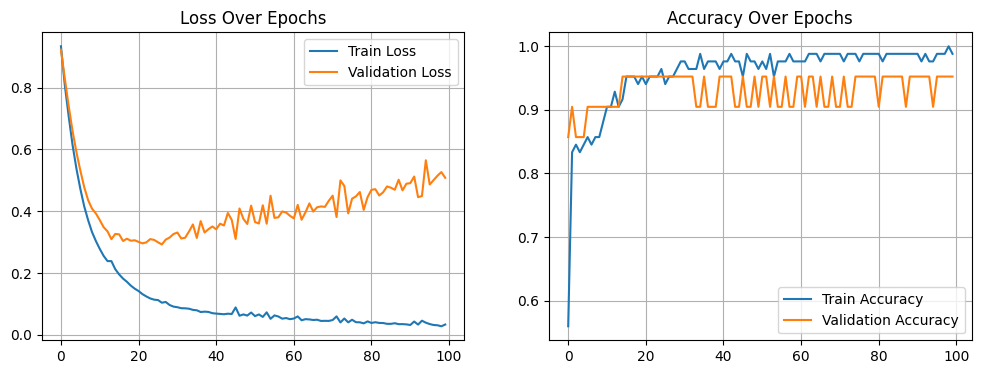

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Test Loss: 0.009061340242624283
Test Accuracy: 1.0


In [ ]:
# Predictions
predictions = model.predict(X_test)
predictions

2/2 [==============================] - 0s 7ms/step


array([[9.06155270e-04, 9.93631303e-01, 5.46245277e-03],
       [9.99855518e-01, 1.44387144e-04, 1.13740420e-07],
       [3.37285783e-10, 1.25200609e-06, 9.99998629e-01],
       [1.34728057e-03, 9.84840751e-01, 1.38119301e-02],
       [1.26790605e-04, 9.98327792e-01, 1.54545740e-03],
       [9.99853134e-01, 1.46647566e-04, 3.47213756e-07],
       [2.72686919e-03, 9.97153938e-01, 1.19086515e-04],
       [5.75958938e-06, 1.02712715e-03, 9.98967171e-01],
       [5.95314377e-05, 7.95127273e-01, 2.04813257e-01],
       [6.44399726e-04, 9.99100566e-01, 2.55085208e-04],
       [1.93306463e-04, 1.66242328e-02, 9.83182371e-01],
       [9.99970615e-01, 2.92977311e-05, 5.57772744e-08],
       [9.99948561e-01, 5.12935876e-05, 9.29108310e-08],
       [9.99966443e-01, 3.33563621e-05, 7.65524746e-08],
       [9.99973834e-01, 2.61207242e-05, 1.00675592e-08],
       [3.62758245e-03, 9.84732509e-01, 1.16399843e-02],
       [8.05731474e-07, 3.74613846e-05, 9.99961674e-01],
       [1.09273526e-04, 9.99855